<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Multiple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement Multiple Linear Regression
* Create a model, train it, test it and use the model


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [1]:
import piplite

await piplite.install(['openpyxl==3.0.9','pandas','numpy','matplotlib','scikit-learn','seaborn','scipy','folium','nbformat','plotly','pywaffle'])

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import pylab as pl
from PIL import Image # converting images into arrays

from pyodide.http import pyfetch # for downloading datasets into your browser via: async def download(url,filename): ...

from js import fetch # better method?: for downloading data and preparing it to be able to read it into a dataframe
import io # in conjunction with js fetch for downloading data and preparing it to be able to read it into a dataframe

import plotly.express as px # plotting graphs with plotly.express sub-module (high-level wrapper)
import plotly.graph_objects as go # plotting graphs with plotly.graph_objects sub-module (low-level interface)

In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('default') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.2


In [4]:
# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # module to perform polynomial transform on multiple features
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Splitting data into train and test data sets
from sklearn.model_selection import train_test_split # good method
from sklearn.model_selection import cross_val_score # best method !
from sklearn.model_selection import cross_val_predict

# importing evaluation metrics to calculate accuracy
from sklearn.metrics import r2_score # R-squared/R^2 --> used when single variable polynomial function ?? (false)
from sklearn.metrics import mean_squared_error

## Pipelines ##
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
def DistributionPlot(actual, predicted, RedName, BlueName, Title):
    plt.figure()
    
    ax1 = sns.kdeplot(actual, color="r", label=RedName)
    ax2 = sns.kdeplot(predicted, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('CO2 Emissions')
    plt.ylabel('Proportion')
    
    plt.legend()
    
    plt.show()
    plt.close()

### Downloading Data
we will use the link, we will use !wget to download it from IBM Object Storage.


In [7]:
path_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [8]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)



<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [9]:
await download(path_url, "FuelConsumption.csv")
path = path_url
path="FuelConsumption.csv"

In [10]:
df = pd.read_csv(path)

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
resp = await fetch(path_url)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df = pd.read_csv(text)

In [12]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [13]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [14]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


Let's plot Emission values with respect to Engine size:


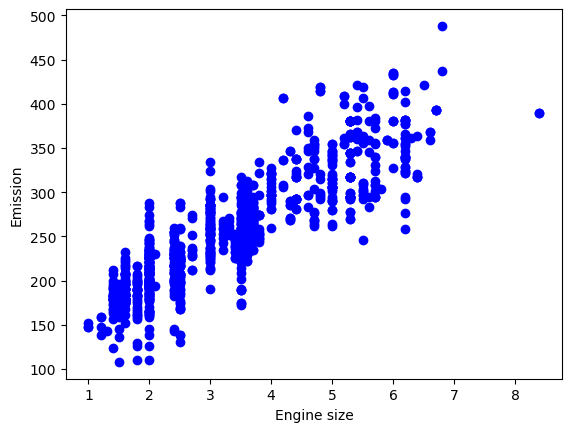

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

(0.0, 507.0)

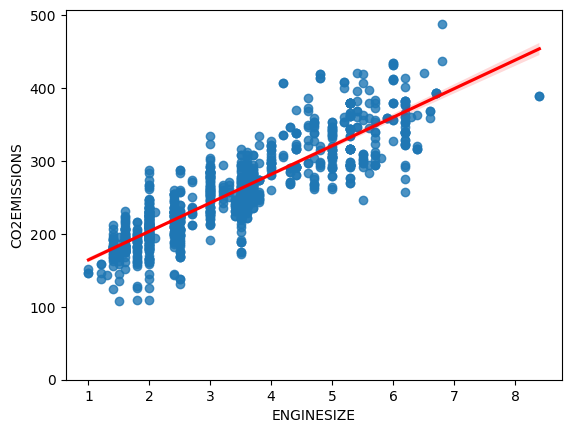

In [16]:
plt.figure()

sns.regplot(x='ENGINESIZE',y='CO2EMISSIONS',data=df,line_kws={'color':'red'})
plt.ylim(0,)

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function: 


In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


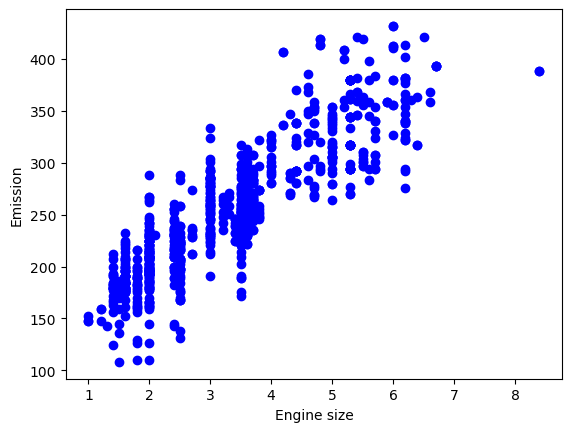

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [19]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
Y = df['CO2EMISSIONS']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 853


In [21]:
Ridge = Ridge()

In [22]:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [23]:
Grid = GridSearchCV(Ridge,parameters)
Grid.fit(x_train,y_train)

best_lm = Grid.best_estimator_
best_lm

Ridge(alpha=10)

In [24]:
best_lm.coef_

array([11.26969233,  6.53493771,  4.47962352,  0.75536475,  4.13064179])

In [25]:
yhat_unseen = cross_val_predict(best_lm,x_test,y_test,cv=5)
yhat_unseen[0:5]

array([254.26072534, 193.20221434, 199.14009367, 186.82954554,
       307.16766822])

In [26]:
cv_score_unseen = cross_val_score(best_lm,x_test,y_test,cv=5)
print('CV Score mean:', cv_score_unseen.mean())
print('CV Score standard deviation:', cv_score_unseen.std())

CV Score mean: 0.8500225644040287
CV Score standard deviation: 0.019584008429747075


In [27]:
best_lm.score(x_test,y_test)

0.864095812668232

In [28]:
mean_squared_error(y_test,yhat_unseen)

591.288359227017

In [29]:
DistributionPlot

<function __main__.DistributionPlot(actual, predicted, RedName, BlueName, Title)>

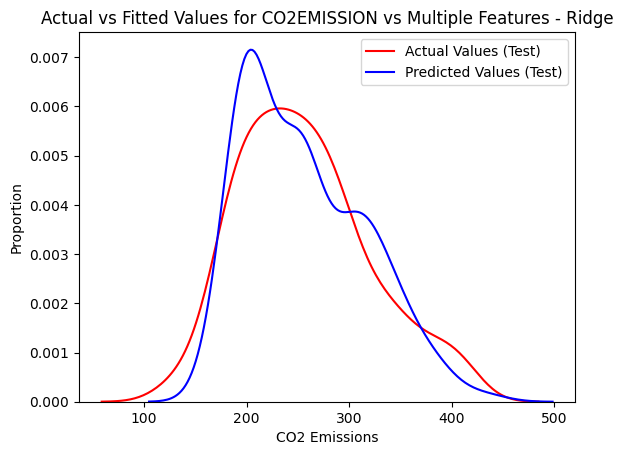

In [30]:
Title = 'Actual vs Fitted Values for CO2EMISSION vs Multiple Features - Ridge'
DistributionPlot(y_test, yhat_unseen, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(x_train,y_train)

LinearRegression()

In [33]:
lm.coef_

array([11.67432508,  6.33698637, -6.04505337, -7.96197085, 23.29812902])

In [34]:
yhat_lm = lm.predict(x_test)
yhat_lm[0:5]

array([256.8473316 , 193.4037422 , 198.96292987, 184.03838383,
       306.17792874])

In [35]:
lm.score(x_train,y_train)

0.8639720754098357

In [36]:
lm.score(x_test,y_test)

0.8640107647660813

In [37]:
mean_squared_error(y_test,yhat_lm)

551.6331882137705

In [38]:
DistributionPlot

<function __main__.DistributionPlot(actual, predicted, RedName, BlueName, Title)>

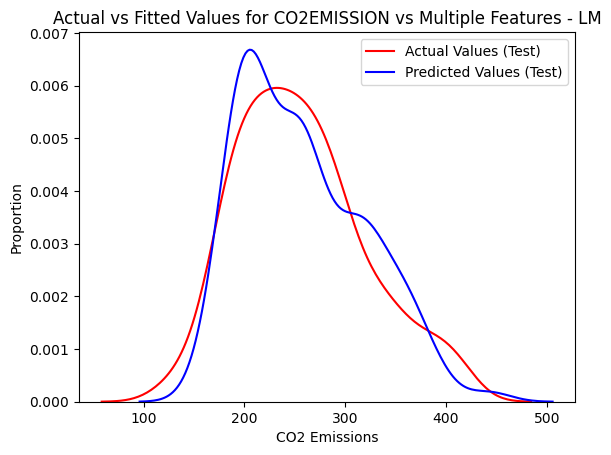

In [39]:
Title = 'Actual vs Fitted Values for CO2EMISSION vs Multiple Features - LM'
DistributionPlot(y_test, yhat_lm, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.91383773 8.68216276 9.44058492]]


As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line. 
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Prediction</h2>


In [41]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual sum of squares: 597.13
Variance score: 0.85


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.


<h2 id="practice">Practice</h2>
Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?


In [42]:
# write your code here

X1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]

In [43]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 853


In [44]:
lm1 = LinearRegression()

lm1.fit(x_train1,y_train1)

LinearRegression()

In [45]:
lm1.coef_

array([11.67888674,  6.33471426,  6.7384351 ,  2.56598033])

In [46]:
yhat_lm1 = lm1.predict(x_test1)
yhat_lm1[0:5]

array([256.70864454, 194.42308203, 198.478442  , 184.3611714 ,
       307.34696621])

In [47]:
lm1.score(x_train1,y_train1)

0.8638617373031483

In [48]:
lm1.score(x_test1,y_test1)

0.8639143480571767

In [49]:
mean_squared_error(y_test1,yhat_lm1)

552.0242975279648

In [50]:
DistributionPlot

<function __main__.DistributionPlot(actual, predicted, RedName, BlueName, Title)>

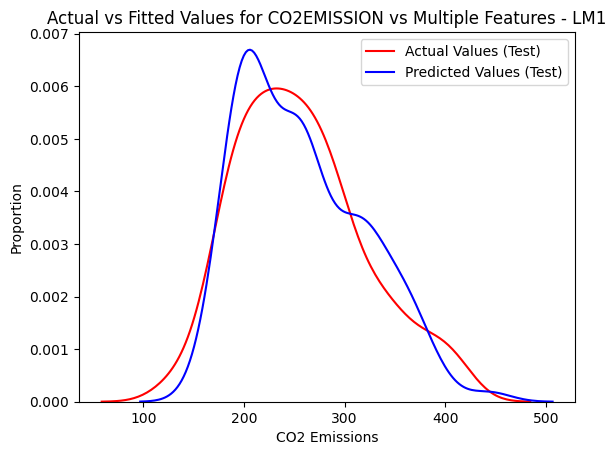

In [51]:
Title = 'Actual vs Fitted Values for CO2EMISSION vs Multiple Features - LM1'
DistributionPlot(y_test1, yhat_lm1, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

<details><summary>Click here for the solution</summary>

```python
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

```

</details>


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>



In [52]:
from sklearn.linear_model import Ridge

In [53]:
Ridge

sklearn.linear_model._ridge.Ridge

In [54]:
x_data = df.drop('CO2EMISSIONS', axis=1)
y_data = df['CO2EMISSIONS']

# df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

pr=PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x_test_pr = pr.fit_transform(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]

RR = Ridge()

Grid = GridSearchCV(RR, parameters, cv=5)

Grid.fit(x_train_pr, y_train)

BestRR = Grid.best_estimator_

cv_scores_test_data, cv_scores_train_data = cross_val_score(BestRR, x_test_pr, y_test, cv=5), cross_val_score(BestRR, x_train_pr, y_train, cv=5)

In [55]:
print('Best estimator/alpha hyperparameter (2nd order polynomial used):', BestRR,'\n')
print('Intercept:', BestRR.intercept_)
print('Coefficients/slope: \n', BestRR.coef_)

Best estimator/alpha hyperparameter (2nd order polynomial used): Ridge(alpha=10) 

Intercept: 2.4247656516153597
Coefficients/slope: 
 [ 0.         -4.09871904 -7.6778966  17.83396232 12.67653629  2.49224167
 -8.64731968  0.3877203   4.22787157  1.33684254  2.68345149 -1.02517333
 -0.617413   -1.25849107  0.24932519]


In [56]:
print('Cross Validation Score mean on test data: %.4f' % cv_scores_test_data.mean())
print('Cross Validation Score mean on train data: %.4f' % cv_scores_train_data.mean(),'\n')
print('CV Score standard deviation on test data: %.4f' % cv_scores_test_data.std())
print('CV Score standard deviation on train data: %.4f' % cv_scores_train_data.std())

Cross Validation Score mean on test data: 0.8631
Cross Validation Score mean on train data: 0.9012 

CV Score standard deviation on test data: 0.0158
CV Score standard deviation on train data: 0.0139


In [57]:
print('Regular r2 score method on test data:', BestRR.score(x_test_pr, y_test))
print('Regular r2 score method on train data:', BestRR.score(x_train_pr, y_train))

Regular r2 score method on test data: 0.8912914393022604
Regular r2 score method on train data: 0.9117969618972372


In [58]:
yhat_poly2_cv = cross_val_predict(BestRR, x_test_pr, y_test, cv=5)
yhat_poly2_cv[0:5]

array([256.40335402, 195.09944545, 199.36271185, 178.85335529,
       311.64975649])

In [59]:
yhat_poly2 = BestRR.predict(x_test_pr)
yhat_poly2[0:5]

array([266.56257887, 199.86539896, 198.20364679, 169.70338307,
       318.93324036])

In [60]:
print('Mean Squared Error on test data (cv_predict):', mean_squared_error(y_test, yhat_poly2_cv))
print('Mean Squared Error on test data (regular):', mean_squared_error(y_test, yhat_poly2))

Mean Squared Error on test data (cv_predict): 543.8562325161198
Mean Squared Error on test data (regular): 440.9705652118199


In [61]:
DistributionPlot

<function __main__.DistributionPlot(actual, predicted, RedName, BlueName, Title)>

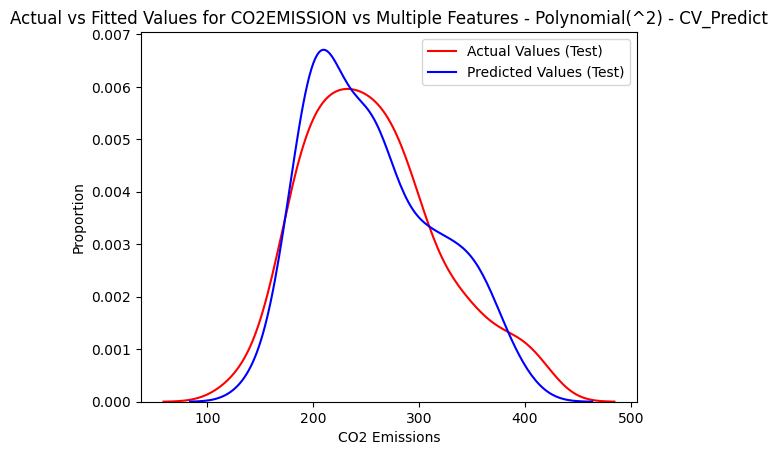

In [62]:
Title = 'Actual vs Fitted Values for CO2EMISSION vs Multiple Features - Polynomial(^2) - CV_Predict'
DistributionPlot(y_test, yhat_poly2_cv, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

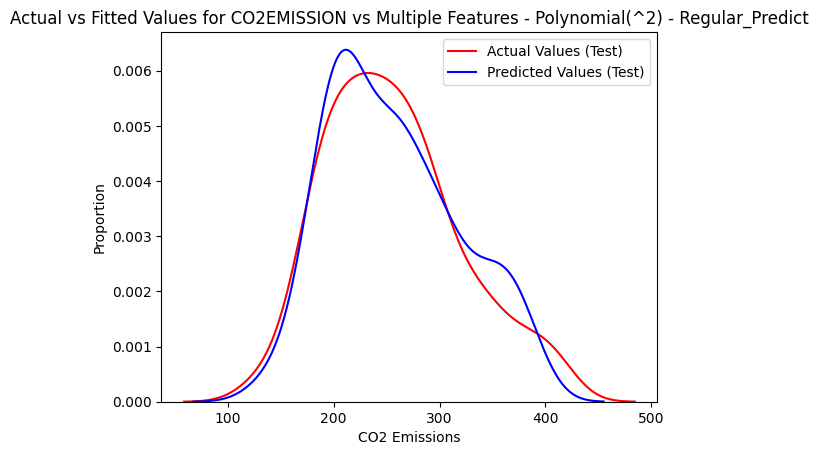

In [63]:
Title = 'Actual vs Fitted Values for CO2EMISSION vs Multiple Features - Polynomial(^2) - Regular_Predict'
DistributionPlot(y_test, yhat_poly2, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

In [67]:
## TESTING PIPELINE THAT ITERATES THROUGH DIFFERENT ORDER POLYNOMIALS AND DIFFERENT VALUES OF ALPHA
## INTENDED OUTPUT = best parameters and the best score, prediction, r2_score and mean_squared_error

x_data = df.drop('CO2EMISSIONS', axis=1)
y_data = df['CO2EMISSIONS']

# df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]


x_train, x_test, y_train, y_test = train_test_split(x_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']].astype(float), y_data, test_size=0.2, random_state=1)


# Import the necessary modules
from sklearn.linear_model import Ridge # Ridge regression is a linear model with L2 regularization, which uses alpha as a parameter
from sklearn.preprocessing import PolynomialFeatures # This is a transformer that creates polynomial features from the original features
from sklearn.pipeline import make_pipeline # This is a function that creates a pipeline from a list of steps
from sklearn.model_selection import GridSearchCV # This is the class that performs grid search over specified parameters

# Define the pipeline
# The pipeline consists of two steps: polynomial features and ridge regression
# The degree of the polynomial features and the alpha of the ridge regression are the parameters we want to tune
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Define the parameter grid
# The parameter grid is a dictionary that maps the parameter names to the values we want to try
# The parameter names have the format: stepname__parametername
# For example, polynomialfeatures__degree means the degree parameter of the polynomial features step
param_grid = {
    "polynomialfeatures__degree": [1, 2, 3, 4, 5], # We try 5 different degrees of polynomials
    "ridge__alpha": np.logspace(-4, 4, 9) # We try 9 different values of alpha, evenly spaced on a log scale from 10^-4 to 10^4
}

# Define the grid search object
# The grid search object takes the pipeline, the parameter grid, and other options as arguments
# For example, we can specify the scoring metric, the number of cross-validation folds, and the verbosity level
grid_search = GridSearchCV(pipeline, param_grid, scoring="neg_mean_squared_error", cv=5, verbose=1)

# Fit the grid search object on the training data
# This will try all possible combinations of the parameters and find the best one based on the scoring metric and cross-validation
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best estimator to make predictions on the test data
y_pred = grid_search.predict(x_test)

# Evaluate the performance on the test data using some metric, such as R^2 or mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print("R^2 score: ", r2_score(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.0867e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.77569e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.48453e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.46319e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.05982e-18): resu

Best parameters:  {'polynomialfeatures__degree': 4, 'ridge__alpha': 10.0}
Best score:  -264.9127803413721
R^2 score:  0.9549664543717308
Mean squared error:  182.67621189839838


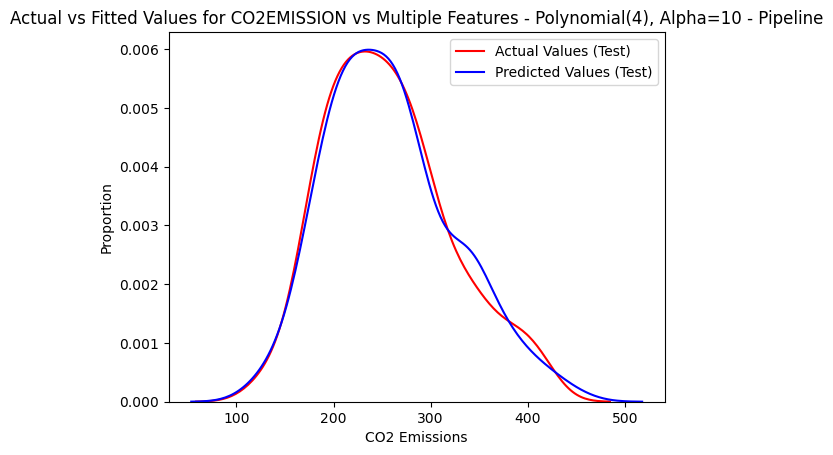

In [68]:
Title = 'Actual vs Fitted Values for CO2EMISSION vs Multiple Features - Polynomial(4), Alpha=10 - Pipeline'
DistributionPlot(y_test, y_pred, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03  | 2.1  | Lakshmi  | Made changes in URL |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
